In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\TV_Sales.csv")
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


# without removing outliers

In [3]:
df.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


In [4]:
df.tail()

,TV,Sales
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411
4571,42.0,148.202414


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [7]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [9]:
df.isnull().sum()

TV       10
Sales     6
dtype: int64

In [10]:
df.dropna(inplace=True)

In [ ]:
df.fillna()

In [11]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [16]:
x=df[["TV"]].values

In [17]:
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [ ]:
sc=StandardScaler()

In [ ]:
x=fit_transform(x)

In [19]:
y=df[["Sales"]].values

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
model=LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([[3.560876]])

In [24]:
model.intercept_

array([-0.09698428])

In [25]:
traing_score=model.score(x_train,y_train)*100
traing_score

99.89945329945171

In [26]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

99.89974160292293

In [27]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2.3632431170394623

In [28]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

8.610468010474165

In [29]:
y_pred=model.predict(x)

In [30]:
y_pred

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

In [31]:
output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
output

,ACTUAL,PREDICTED
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156
...,...,...
4551,94.685866,92.485792
4552,249.101915,252.725212
4553,163.631457,156.581560
4554,253.610411,252.725212


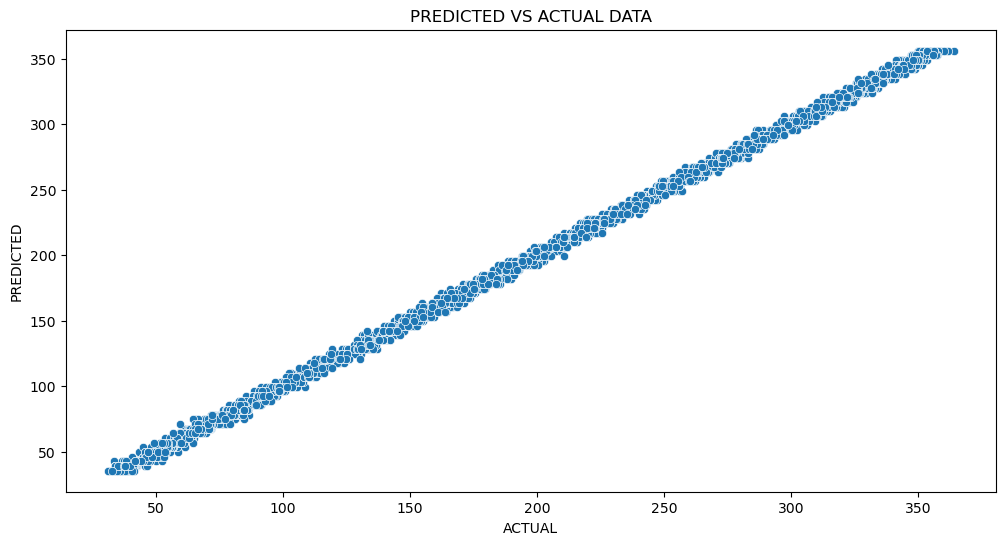

In [32]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=output,x="ACTUAL",y="PREDICTED");

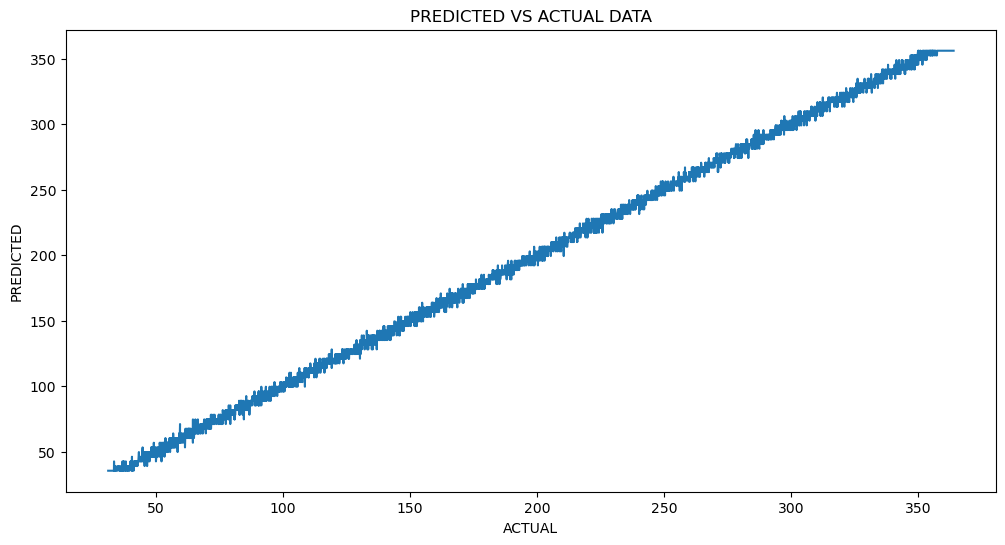

In [34]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=output,x="ACTUAL",y="PREDICTED");

# by removing outliers

In [35]:
data=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\TV_Sales.csv")
data

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


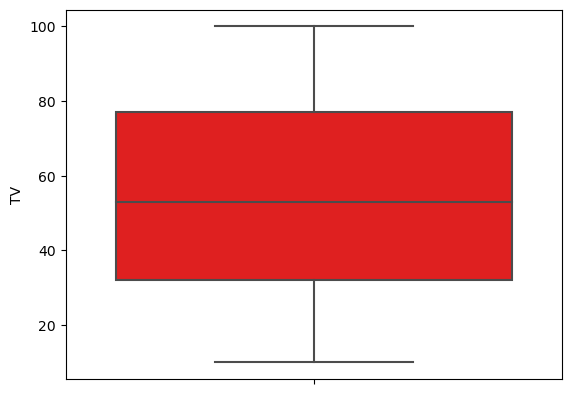

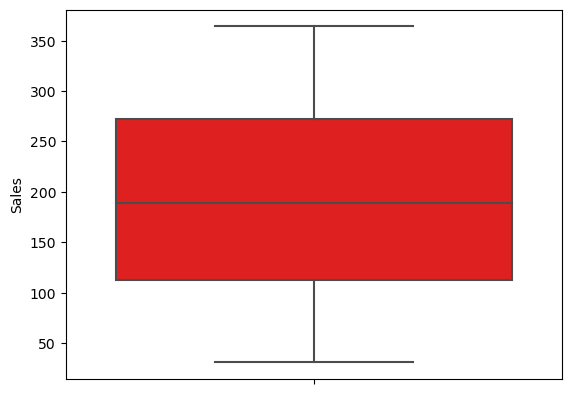

In [38]:
for i in data.columns:
    sns.boxplot(y=data[i],color="red")
    plt.show()

In [39]:
data["TV"].max()

100.0